# Pochopenie dát 
## 1. Import knižníc

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Načítanie a integrácia dát

In [ ]:
c = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition', 'fraud'] 

test1 = pd.read_csv("test.csv", sep="|")
print(test1.count())

test2 = pd.read_csv("fraud_test.csv")
print(test2.count())

test = pd.concat([test1, test2], axis=1)
test

train =  pd.read_csv("train.csv", sep='|')
train

data = pd.concat([test, train], ignore_index=True)
data
#data.to_csv("data.csv")

trustLevel                   498121
totalScanTimeInSeconds       498121
grandTotal                   498121
lineItemVoids                498121
scansWithoutRegistration     498121
quantityModifications        498121
scannedLineItemsPerSecond    498121
valuePerSecond               498121
lineItemVoidsPerPosition     498121
dtype: int64
fraud    498121
dtype: int64


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429,0
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259,0
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000,0
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857,0
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526,0
...,...,...,...,...,...,...,...,...,...,...
499995,1,321,76.03,8,7,2,0.071651,0.236854,0.347826,0
499996,1,397,41.89,5,5,0,0.065491,0.105516,0.192308,1
499997,4,316,41.83,5,8,1,0.094937,0.132373,0.166667,0
499998,2,685,62.68,1,6,2,0.035036,0.091504,0.041667,0


## 3. Zisťovanie kvality dát

In [16]:
data.info()
duplicates = data.duplicated().sum()
print(f"Počet duplicitných riadkov: {duplicates}")
print("NaN: \n",test.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   trustLevel                 500000 non-null  int64  
 1   totalScanTimeInSeconds     500000 non-null  int64  
 2   grandTotal                 500000 non-null  float64
 3   lineItemVoids              500000 non-null  int64  
 4   scansWithoutRegistration   500000 non-null  int64  
 5   quantityModifications      500000 non-null  int64  
 6   scannedLineItemsPerSecond  500000 non-null  float64
 7   valuePerSecond             500000 non-null  float64
 8   lineItemVoidsPerPosition   500000 non-null  float64
 9   fraud                      500000 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 38.1 MB
Počet duplicitných riadkov: 0
NaN: 
 trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids           

## 4. Zisťovanie rozsahov atribútov

In [5]:
#data.describe()
#data.describe().T[['min', 'max']]

for col in c:
    print(f'\n{col}:')
    print(data[col].describe())
    print(f'unique: {len(data[col].unique())}')
    print(f'min: {data[col].min()}')
    print(f'max: {data[col].max()}')
    


trustLevel:
count    500000.000000
mean          3.502876
std           1.707678
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           6.000000
Name: trustLevel, dtype: float64
unique: 6
min: 1
max: 6

totalScanTimeInSeconds:
count    500000.000000
mean        915.670946
std         528.778479
min           1.000000
25%         458.000000
50%         916.000000
75%        1374.000000
max        1831.000000
Name: totalScanTimeInSeconds, dtype: float64
unique: 1831
min: 1
max: 1831

grandTotal:
count    500000.000000
mean         49.992280
std          28.873697
min           0.000000
25%          24.930000
50%          50.040000
75%          75.020000
max          99.990000
Name: grandTotal, dtype: float64
unique: 10000
min: 0.0
max: 99.99

lineItemVoids:
count    500000.000000
mean          5.495828
std           3.447693
min           0.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          11.00000

## 5. Vizualizácia početností


trustLevel:


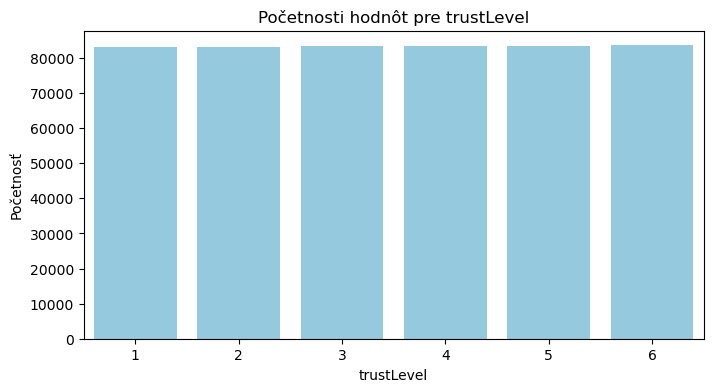


totalScanTimeInSeconds:


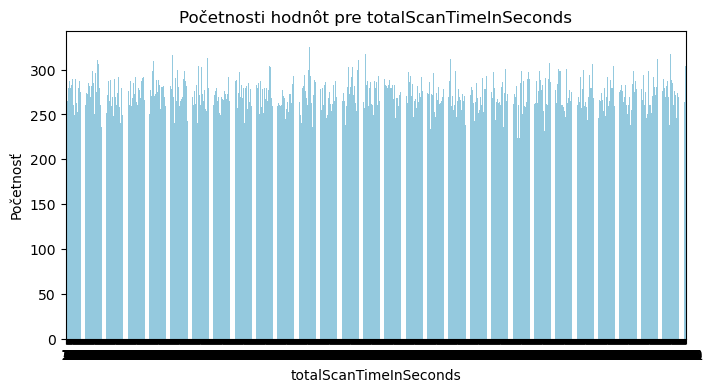


grandTotal:


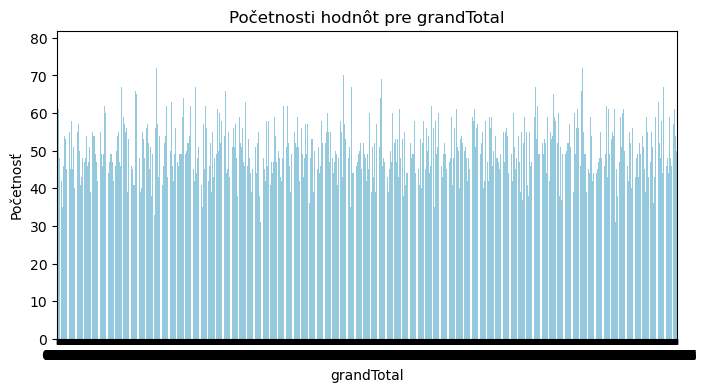


lineItemVoids:


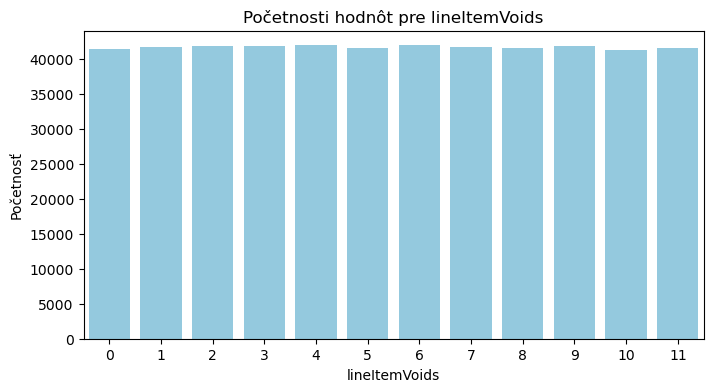


scansWithoutRegistration:


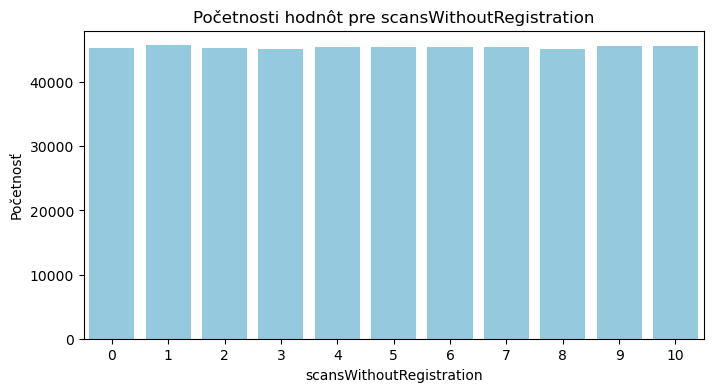


quantityModifications:


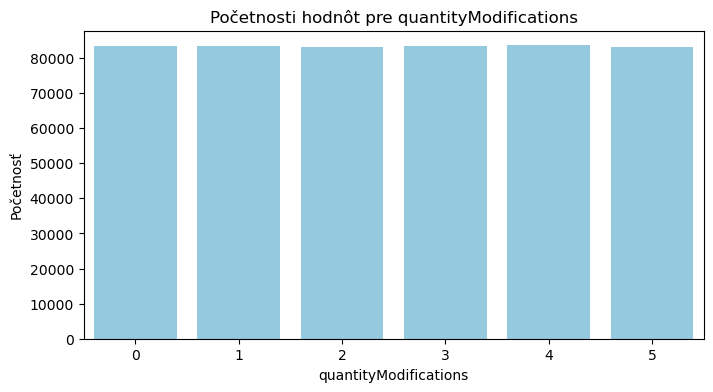


scannedLineItemsPerSecond:


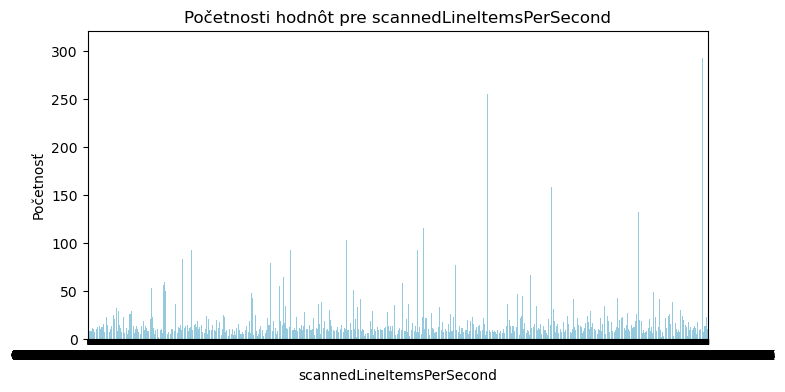


lineItemVoidsPerPosition:


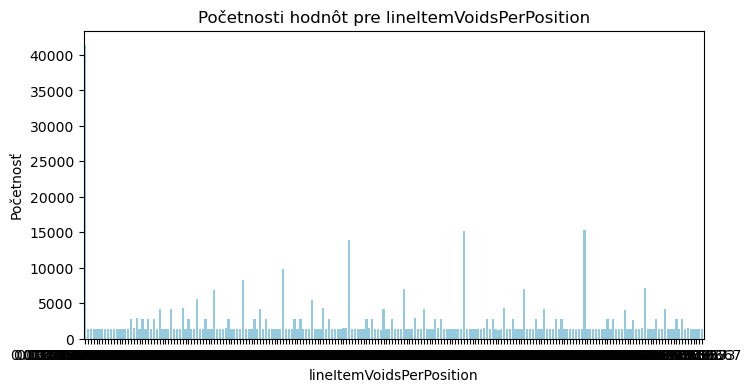


fraud:


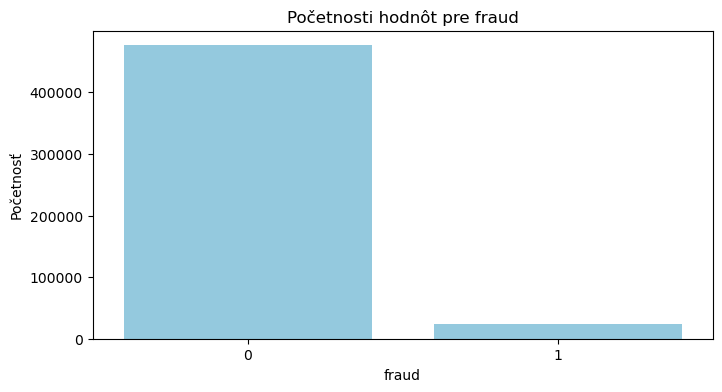

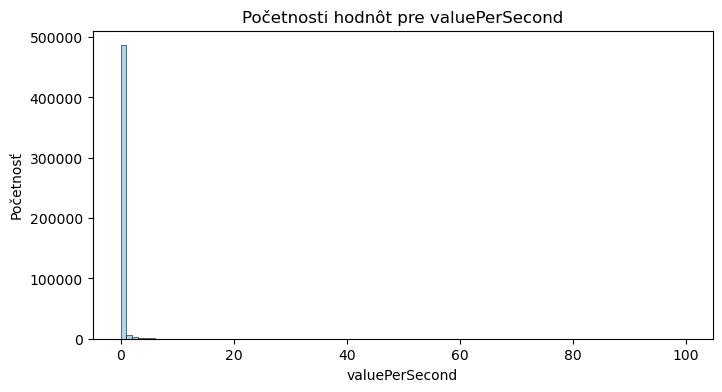

In [6]:
# bez 'valuePerSecond'
c = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'lineItemVoidsPerPosition', 'fraud'] 

for col in c:
    print(f'\n{col}:')
    
    counts = data[col].value_counts().reset_index()
    counts.columns = [col, 'count']
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=counts[col], y=counts['count'], color = 'skyblue')
    plt.xlabel(col)
    plt.ylabel('Početnosť')
    plt.title(f'Početnosti hodnôt pre {col}')
    plt.show()

# 'valuePerSecond'
plt.figure(figsize=(8, 4))
sns.histplot(data['valuePerSecond'], bins=100, color='skyblue')
plt.xlabel('valuePerSecond')
plt.ylabel('Početnosť')
plt.title('Početnosti hodnôt pre valuePerSecond')
plt.show()

## 6. Zistenie outlierov

In [ ]:
Q1 = data.quantile(0.25)
#print(Q1)
Q3 = data.quantile(0.75)
#print(Q3)
IQR = Q3 - Q1
#print(IQR)

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

outlier_counts = outliers.sum()

outlier_table = pd.DataFrame({
    'Počet outlierov': outlier_counts,
    'Percento': (outlier_counts / len(data))
})

print(outlier_table)
#outlier_table.to_excel('tabulka_out_data.xlsx')

                           Počet outlierov  Percento
trustLevel                               0  0.000000
totalScanTimeInSeconds                   0  0.000000
grandTotal                               0  0.000000
lineItemVoids                            0  0.000000
scansWithoutRegistration                 0  0.000000
quantityModifications                    0  0.000000
scannedLineItemsPerSecond            58868  0.117736
valuePerSecond                       58896  0.117792
lineItemVoidsPerPosition             55839  0.111678
fraud                                23831  0.047662


## 7. Korelácia pre numerické atribúty

                           totalScanTimeInSeconds  grandTotal  lineItemVoids  scansWithoutRegistration  quantityModifications  scannedLineItemsPerSecond  valuePerSecond  lineItemVoidsPerPosition
totalScanTimeInSeconds                   1.000000   -0.001565      -0.000546                 -0.000853              -0.000641                  -0.170056       -0.169007                 -0.000081
grandTotal                              -0.001565    1.000000       0.000892                  0.001752               0.000284                   0.000550        0.075597                 -0.000803
lineItemVoids                           -0.000546    0.000892       1.000000                  0.001892              -0.000998                  -0.001091       -0.000117                  0.348958
scansWithoutRegistration                -0.000853    0.001752       0.001892                  1.000000               0.000147                  -0.002182       -0.003950                  0.000261
quantityModifications    

<Axes: >

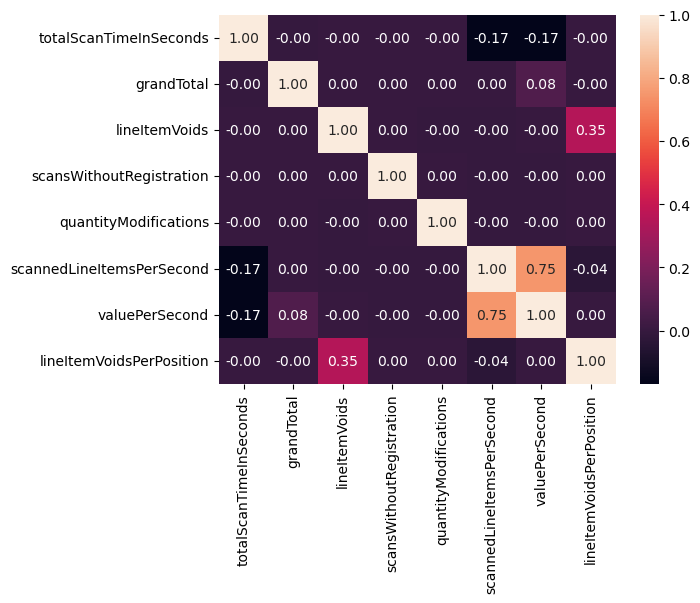

In [8]:
pom_cor = data[['totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']]
cr =  pom_cor.corr()
print(cr.to_string())
sns.heatmap(cr, annot=True, fmt='.2f')

## 8. Cieľová trieda

fraud
0    476169
1     23831
Name: count, dtype: int64


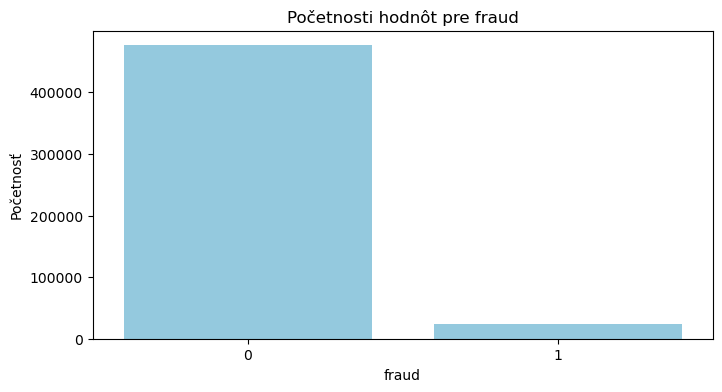

In [9]:
pocetnost = data['fraud'].value_counts()
print(pocetnost)

plt.figure(figsize=(8, 4))
sns.barplot(x=pocetnost.index, y=pocetnost.values, color = 'skyblue')
plt.xlabel('fraud')
plt.ylabel('Početnosť')
plt.title(f'Početnosti hodnôt pre fraud')
plt.show()

## 9. Vzťah cieľovej triedy s numerickými atribútmi 

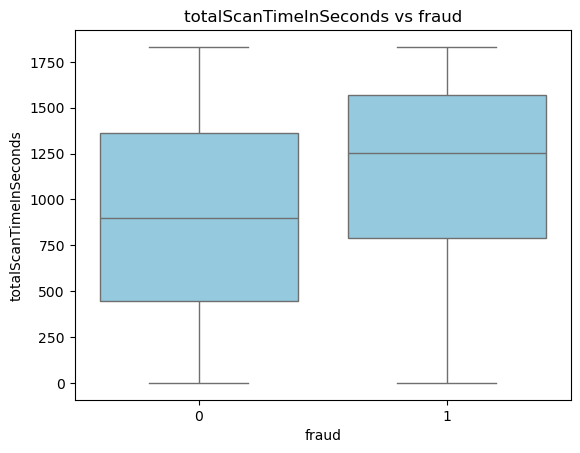

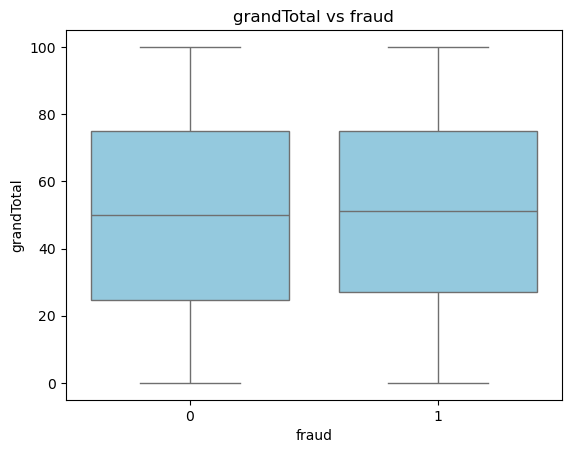

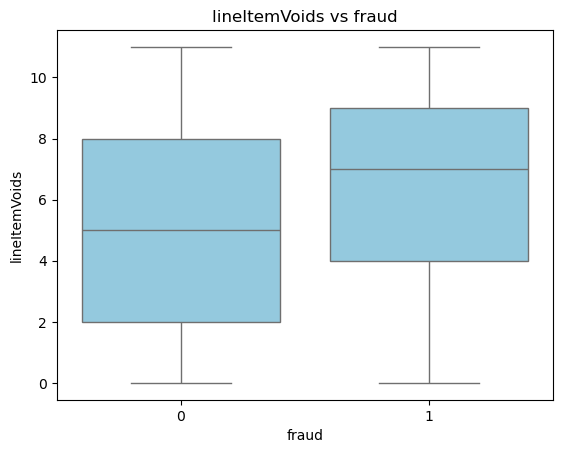

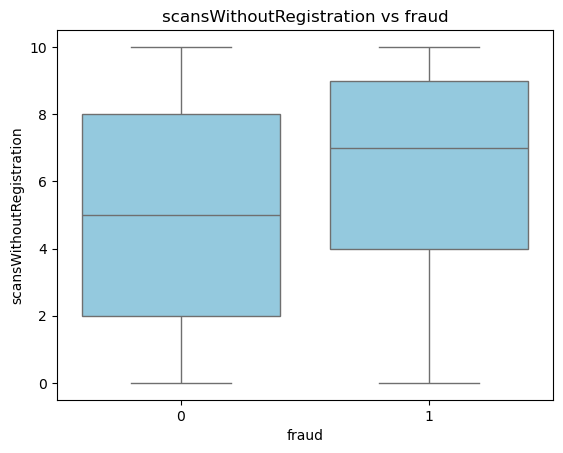

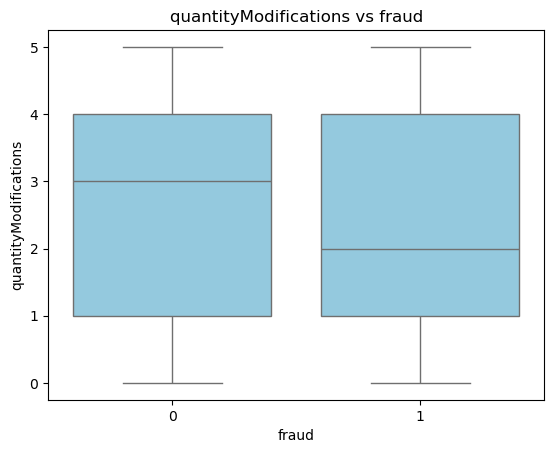

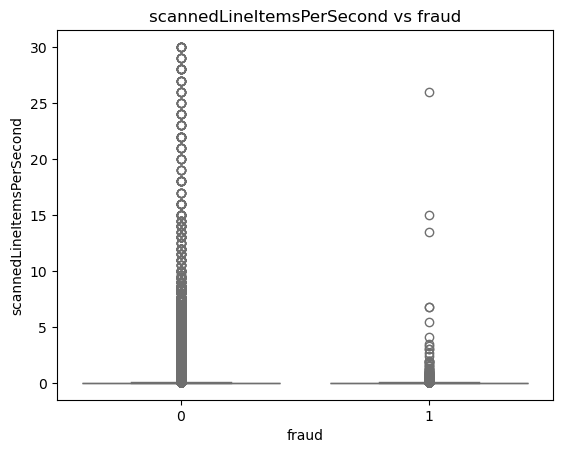

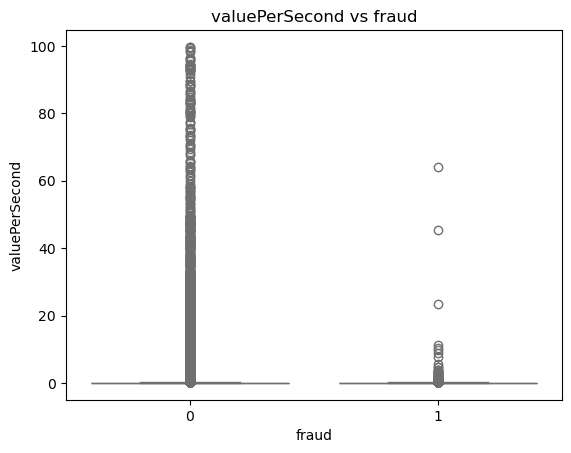

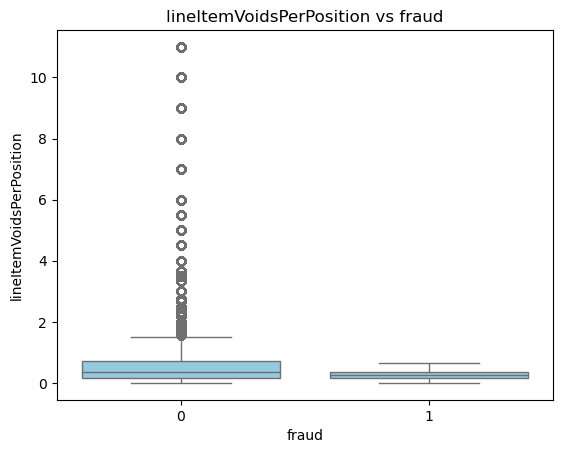

In [10]:
for col in pom_cor:
    #print(f'\n{col}:')
    sns.boxplot(x='fraud', y=col, data=data, color = 'skyblue')
    plt.title(f'{col} vs fraud')
    plt.show()

## 10. Vzťah cieľovej triedy a kategorického atribútu

In [13]:
kont_tab = pd.crosstab(data['trustLevel'], data['fraud'])
kont_tab
#kont_tab.to_excel('tabulka_kont.xlsx')

fraud,0,1
trustLevel,,
1,64421,18624
2,78053,5207
3,83456,0
4,83288,0
5,83353,0
6,83598,0
